# Training Accuracy

Prediction accuracy on the same set of data you trained your model with.

### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

![Overfitting](images/05_overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

![](images/slide1.png)

![](images/slide2.png)

![](images/slide4.png)

# How Can We Avoid Overfitting?

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

![](images/slide3.png)

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [2]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

![Train/test split](images/05_train_test_split.png)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [3]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [4]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [5]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [6]:
# STEP 2: train the model on the training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
# STEP 3: make predictions on the testing set
from sklearn import metrics
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


Repeat for KNN with K=1:

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


# Can you find an even better value for K?

ValueError: x and y must have same first dimension, but have shapes (25,) and (0,)

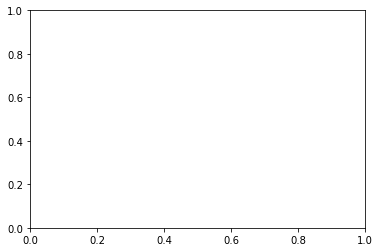

In [9]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = [] # calculate accuracies for each value of K!

#Now we plot:

import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Using a different classification model

In [ ]:
# First split the data

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN (n_neighbors = 5): {0}".format(metrics.accuracy_score(y_test, y_pred)))

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression: {0}".format(metrics.accuracy_score(y_test, y_pred)))

# Where to go next

![](images/slidefinal.png)

# Online Course

https://class.coursera.org/ml-005/lecture
![](images/slideNg.png)

![](images/slideKaggle.png)